In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
strtg_l = ['ran', 'pop', 'var', 'popvar', 'ge']
#pers_strtg_l = ['Random', 'MinRating', 'MaxRating', 'MixedRating', 'MaxRating-Binary-PP','knn']
pers_strtg_l = ['Random', 'MinRating', 'MaxRating', 'MixedRating', 'KNN']

color_l = ['b', 'k', 'r', 'g', 'm']
pers_color_l = ['tab:orange', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan']

label_d = {'ran':'Random', 'pop':'Pop', 'var':'Var', 'popvar': 'Pop-Var', 'ge':'GE', 
           'Random': 'RandomP', 'MinRating': 'MinRating', 'MaxRating': 'MaxRating', 'MixedRating': 'MixedRating', 'MaxRating-Binary-PP': 'MaxRating-Binary-PP',
           'KNN': 'KNN'}
key_d = {'ran':0, 'pop':1, 'var':2, 'popvar': 3, 'ge':4, 
           'Random': 5, 'MinRating': 6, 'MaxRating': 7, 'MixedRating': 8, 'MaxRating-Binary-PP': 9,
           'knn': 10}

## 1. Experiment 1

In [3]:
# For MovieLens 1M
exp1_df = []
for strtg in strtg_l:
    for i in range(5):
        df = pd.read_csv('./outputs_nonpers/'+ strtg +'_exp1_iter' + str(i) + '.csv')
        df['strtg'] = strtg
        exp1_df.append(df)
        
for strtg in pers_strtg_l[:-1]:
    for i in range(5):
        df = pd.read_csv('./outputs_pers_1m/'+ strtg +'_exp1_iter' + str(i) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*287]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp1_df.append(df)

for strtg in pers_strtg_l[-1:]:
    # KNN only has 3 iters, and 14 epochs (37 epochs less than others)
    for i in range(3):
        df = pd.read_csv('./outputs_pers_1m/'+ strtg +'_exp1_iter' + str(i) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*324]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp1_df.append(df)
        
exp1_df = pd.concat(exp1_df)
exp1_df = exp1_df.reset_index()

In [3]:
# For MovieLens 100K
exp1_df = []
for strtg in strtg_l:
    for i in range(5):
        df = pd.read_csv('./outputs_nonpers/'+ strtg +'_exp1_iter' + str(i+1) + '.csv')
        df['strtg'] = strtg
        exp1_df.append(df)
        
for strtg in pers_strtg_l:
    for i in range(5):
        df = pd.read_csv('./outputs_pers/'+ strtg +'_exp1_iter' + str(i+1) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*104]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp1_df.append(df)
        
exp1_df = pd.concat(exp1_df)
exp1_df = exp1_df.reset_index()

### 1.1. RMSE Comparison

In [4]:
df = exp1_df[['index', 'rmse', 'strtg']]

In [5]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']

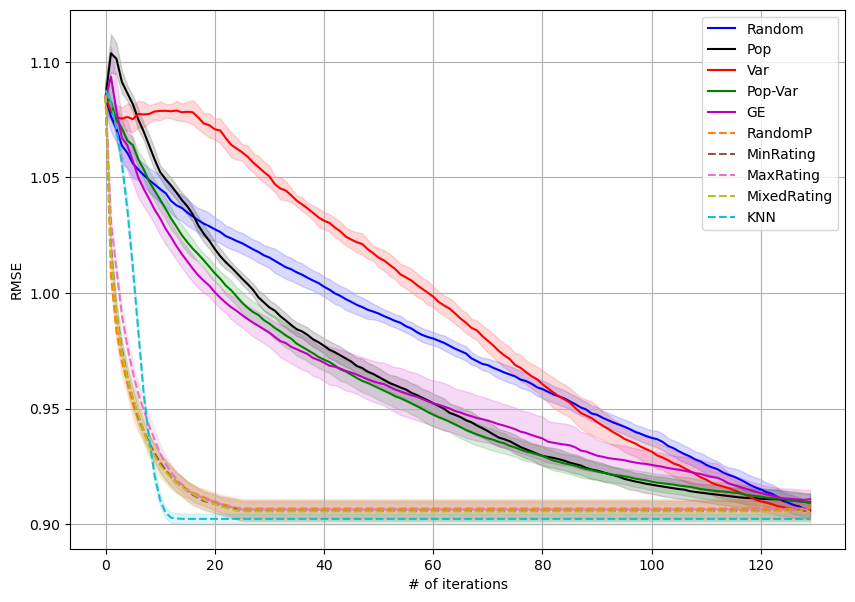

In [6]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '-', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '--', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)
# ax.plot(list(range(0, len(results[0][1]['rmse']))), [fin_acc]*len(list(range(0, len(results[0][1]['rmse'])))),'-', label='all-tr')
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_rmse_ml100k_exp1_080924.png', dpi=300)

### 1.2. RMSE Difference

In [7]:
df = exp1_df[['index', 'rmse_pro','rmse_unpro', 'strtg']]

In [8]:
df['rmse_diff'] = df['rmse_pro'] - df['rmse_unpro']
df = df[['index', 'rmse_diff', 'strtg']]

/var/folders/v3/2p6t1d2n5271pw5ytpwwh_9w0000gn/T/ipykernel_24782/2481093621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rmse_diff'] = df['rmse_pro'] - df['rmse_unpro']


In [9]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']

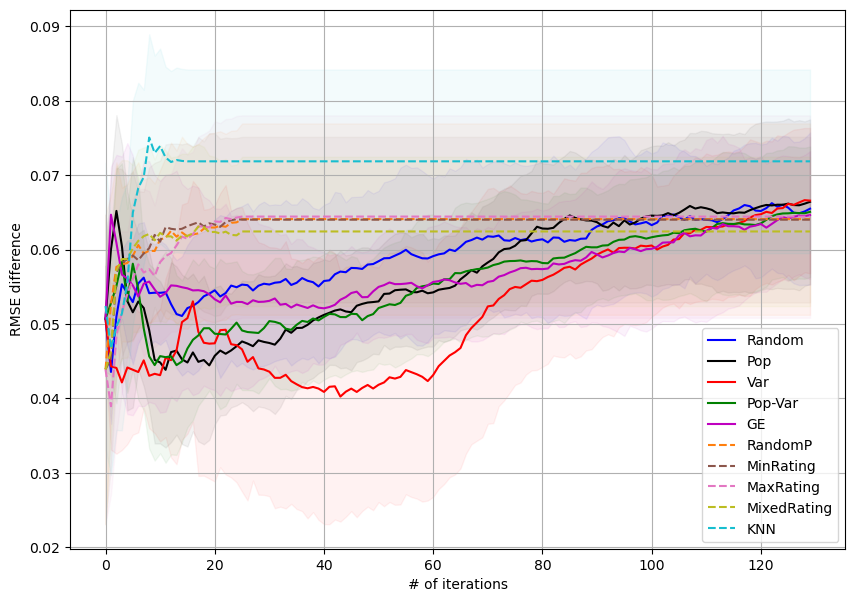

In [10]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '-', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '--', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE difference')

plt.savefig('./plots/cl_rmse_diff_ml100k_exp1_080924.png', dpi=300)

### 1.3. The RMSE of each group separately

In [11]:
pro_df = exp1_df[['index', 'rmse_pro', 'strtg']]
unpro_df = exp1_df[['index', 'rmse_unpro', 'strtg']]

In [12]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']

In [13]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']

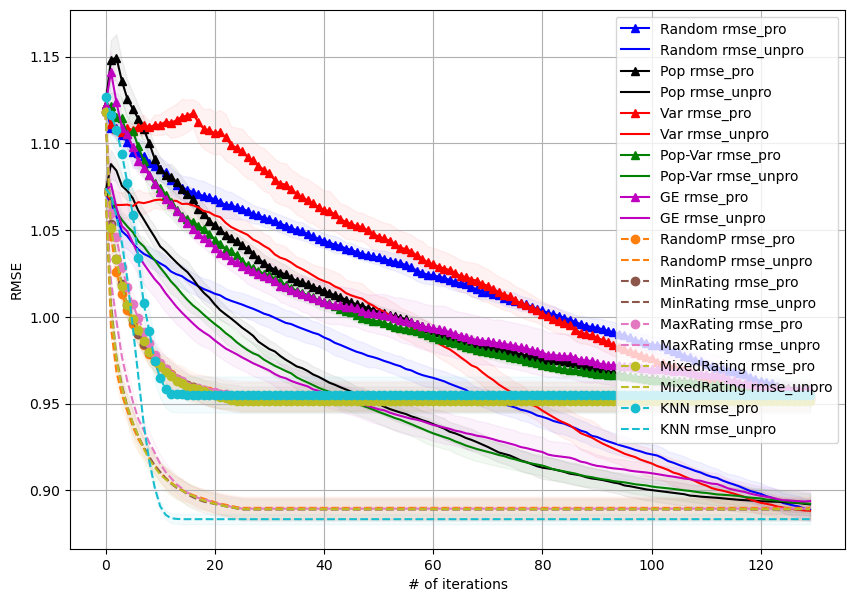

In [14]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '-^', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '-', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '--o', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '--', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_proUnpro_rmse_diff_ml100k_exp1_080924.png', dpi=300)

#### 1.3.1 Make Table

In [15]:
exp1_table1_pro_df = pro_df_grouped[['index','strtg', 'mean']]
exp1_table1_unpro_df = unpro_df_grouped[['index','strtg', 'mean']]

In [16]:
print('Experiment 1, RMSE of unpersonalized algorithms for female users')
exp1_table1_pro_df[(exp1_table1_pro_df['strtg'].isin(strtg_l))&(exp1_table1_pro_df['index'].isin([0,50,100,150,200,250,300]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 1, RMSE of unpersonalized algorithms for female users


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,1.048,0.994,0.971,0.953,0.936,0.920,0.906
pop,1.048,0.972,0.944,0.925,0.910,0.902,0.898
var,1.048,1.025,0.995,0.963,0.935,0.914,0.900
popvar,1.048,0.965,0.939,0.921,0.909,0.902,0.898
ge,1.048,0.966,0.939,0.923,0.908,0.901,0.897


In [17]:
print('Experiment 1, RMSE of unpersonalized algorithms for male users')
exp1_table1_unpro_df[(exp1_table1_unpro_df['strtg'].isin(strtg_l))&(exp1_table1_unpro_df['index'].isin([0,50,100,150,200,250,300]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 1, RMSE of unpersonalized algorithms for male users


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,1.031,0.965,0.940,0.919,0.900,0.882,0.864
pop,1.031,0.949,0.914,0.892,0.872,0.862,0.856
var,1.031,0.990,0.956,0.923,0.894,0.873,0.859
popvar,1.031,0.938,0.908,0.886,0.871,0.862,0.856
ge,1.031,0.932,0.900,0.881,0.867,0.859,0.855


In [18]:
print('Experiment 1, RMSE of personalized algorithms for female users')
exp1_table1_pro_df[(exp1_table1_pro_df['strtg'].isin(pers_strtg_l))&(exp1_table1_pro_df['index'].isin([0,5,10,20,30,40,50]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 1, RMSE of personalized algorithms for female users


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,1.047,0.940,0.914,0.899,0.896,0.895,0.895
MinRating,1.047,0.943,0.917,0.901,0.897,0.895,0.895
MaxRating,1.047,0.945,0.918,0.901,0.896,0.895,0.895
MixedRating,1.047,0.942,0.916,0.901,0.897,0.895,0.895
KNN,1.048,0.968,0.900,0.895,0.895,0.895,0.895


In [19]:
print('Experiment 1, RMSE of personalized algorithms for male users')
exp1_table1_unpro_df[(exp1_table1_unpro_df['strtg'].isin(pers_strtg_l))&(exp1_table1_unpro_df['index'].isin([0,5,10,20,30,40,50]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 1, RMSE of personalized algorithms for male users


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,1.028,0.905,0.876,0.859,0.855,0.853,0.853
MinRating,1.028,0.908,0.878,0.860,0.855,0.853,0.853
MaxRating,1.028,0.912,0.880,0.861,0.855,0.853,0.853
MixedRating,1.028,0.907,0.877,0.860,0.855,0.853,0.853
KNN,1.030,0.948,0.863,0.855,0.855,0.855,0.855


### 1.3.2 t-test

In [20]:
alpha = 0.01

In [21]:
star_df = []
for strtg in strtg_l:
    for ind in [0,50,100,150,200,250,300]:
        rmse_pro = pro_df[(pro_df['strtg']==strtg)&(pro_df['index']==ind)]['rmse_pro']
        rmse_unpro = unpro_df[(unpro_df['strtg']==strtg)&(unpro_df['index']==ind)]['rmse_unpro']
        t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)
        if p<alpha:
            star_df.append([ind, strtg, True])
        else:
            star_df.append([ind, strtg, False])
star_df = pd.DataFrame(star_df, columns=['index', 'strtg', 'star'])

In [22]:
print('Experiment 1, nonpersonalized')
star_df.pivot(index='strtg', columns='index', values='star').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 1, nonpersonalized


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,True,True,True,True,True,True,True
pop,True,True,True,True,True,True,True
var,True,True,True,True,True,True,True
popvar,True,True,True,True,True,True,True
ge,True,True,True,True,True,True,True


In [23]:
pers_star_df = []
for strtg in pers_strtg_l:
    for ind in [0,5,10,20,30,40,50]:
        rmse_pro = pro_df[(pro_df['strtg']==strtg)&(pro_df['index']==ind)]['rmse_pro']
        rmse_unpro = unpro_df[(unpro_df['strtg']==strtg)&(unpro_df['index']==ind)]['rmse_unpro']
        t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)
        if p<alpha:
            pers_star_df.append([ind, strtg, True])
        else:
            pers_star_df.append([ind, strtg, False])
pers_star_df = pd.DataFrame(pers_star_df, columns=['index', 'strtg', 'star'])

In [25]:
print('Experiment 1, personalized')
pers_star_df.pivot(index='strtg', columns='index', values='star').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 1, personalized


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,True,True,True,True,True,True,True
MinRating,True,True,True,True,True,True,True
MaxRating,True,True,True,True,True,True,True
MixedRating,True,True,True,True,True,True,True
KNN,False,True,True,True,True,True,True


### 1.4. The count of men and women that their info was added at each iteration

In [15]:
pro_df = exp1_df[['index', 'c_pro', 'strtg']]
unpro_df = exp1_df[['index', 'c_unpro', 'strtg']]

In [16]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']

In [17]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']

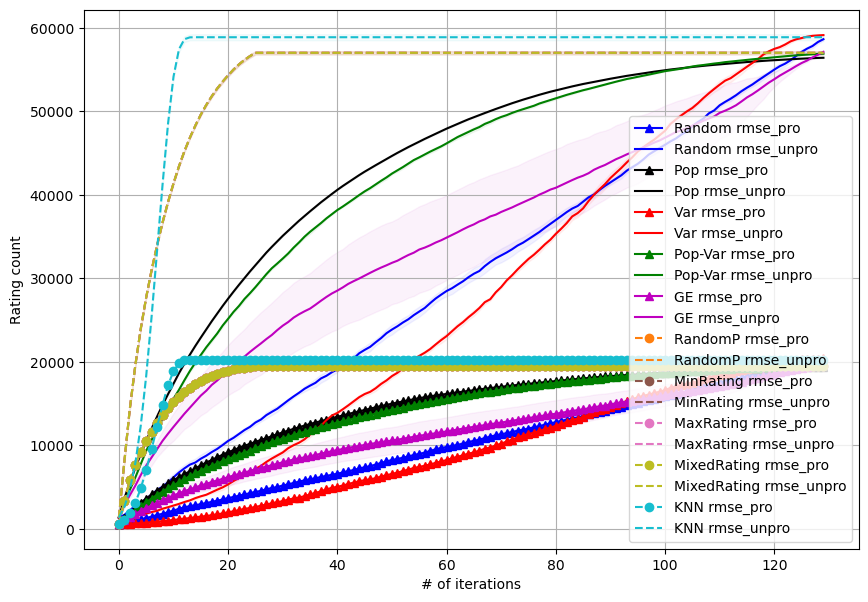

In [18]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '-^', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '-', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '--o', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '--', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('Rating count')

plt.savefig('./plots/cl_proUnpro_rate_c_ml100k_exp1_080924.png', dpi=300)

## 2. Experiment 2

In [19]:
# for MovieLens 1M 
exp2_df = []
# nonpers strategies: 5 iters, 338 epochs/iter
for strtg in strtg_l:
    for i in range(5):
        df = pd.read_csv('./outputs_nonpers_1m/'+ strtg +'_exp2_iter' + str(i) + '.csv')
        df['strtg'] = strtg
        exp2_df.append(df)

# pers strategies: 5 iters, 51 epochs/iter
for strtg in pers_strtg_l[:-1]:
    for i in range(5):
        df = pd.read_csv('./outputs_pers_1m/'+ strtg +'_exp2_iter' + str(i) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*287]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp2_df.append(df)

# KNN: 1 iter, 14 epochs/iter
for strtg in pers_strtg_l[-1:]:
    # KNN only has 1 iters, and 14 epochs (37 epochs less than others)
    for i in range(1):
        df = pd.read_csv('./outputs_pers_1m/'+ strtg +'_exp2_iter' + str(i) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*324]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp2_df.append(df)

exp2_df = pd.concat(exp2_df)
exp2_df = exp2_df.reset_index()

In [19]:
# for MovieLens 100k
exp2_df = []
# nonpers strategies: 5 iters, 130 epochs/iter
for strtg in strtg_l:
    for i in range(5):
        df = pd.read_csv('./outputs_nonpers/'+ strtg +'_exp2_iter' + str(i+1) + '.csv')
        df['strtg'] = strtg
        exp2_df.append(df)

# pers strategies: 6 iters, 26 epochs/iter
for strtg in pers_strtg_l:
    for i in range(6):
        df = pd.read_csv('./outputs_pers/'+ strtg +'_exp2_iter' + str(i+1) + '.csv')
        df = pd.concat([df, df.iloc[[-1]*104]]).reset_index(drop=True)
        df['strtg'] = strtg
        exp2_df.append(df)

exp2_df = pd.concat(exp2_df)
exp2_df = exp2_df.reset_index()

### 2.1. RMSE Comparison

In [20]:
df = exp2_df[['index', 'rmse', 'strtg']]

In [21]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']

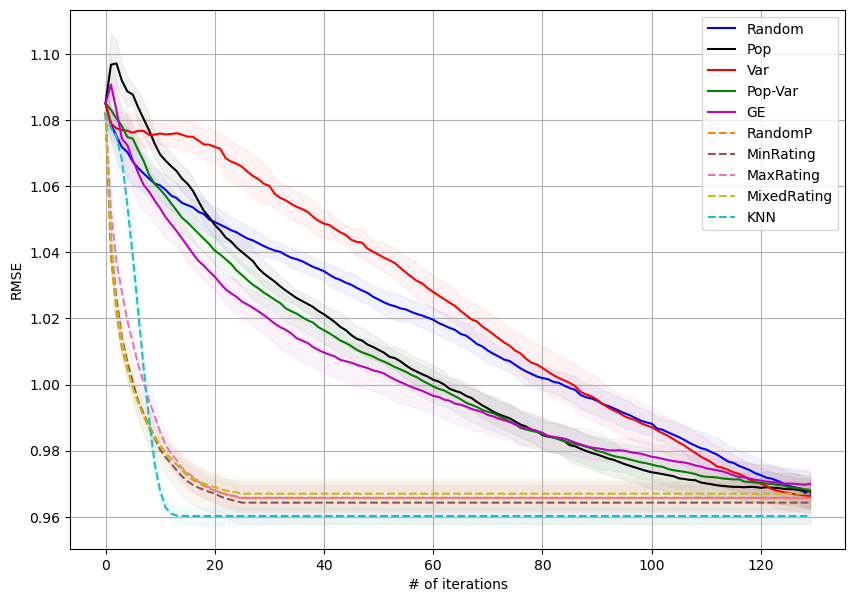

In [22]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '-', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '--', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.plot(list(range(0, len(results[0][1]['rmse']))), [fin_acc]*len(list(range(0, len(results[0][1]['rmse'])))),'-', label='all-tr')
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_rmse_ml100k_exp2_080924.png', dpi=300)

### 2.2. RMSE Difference

In [23]:
df = exp2_df[['index', 'rmse_pro','rmse_unpro', 'strtg']]

In [24]:
df['rmse_diff'] = df['rmse_pro'] - df['rmse_unpro']
df = df[['index', 'rmse_diff', 'strtg']]

/var/folders/v3/2p6t1d2n5271pw5ytpwwh_9w0000gn/T/ipykernel_24782/2481093621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rmse_diff'] = df['rmse_pro'] - df['rmse_unpro']


In [25]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']

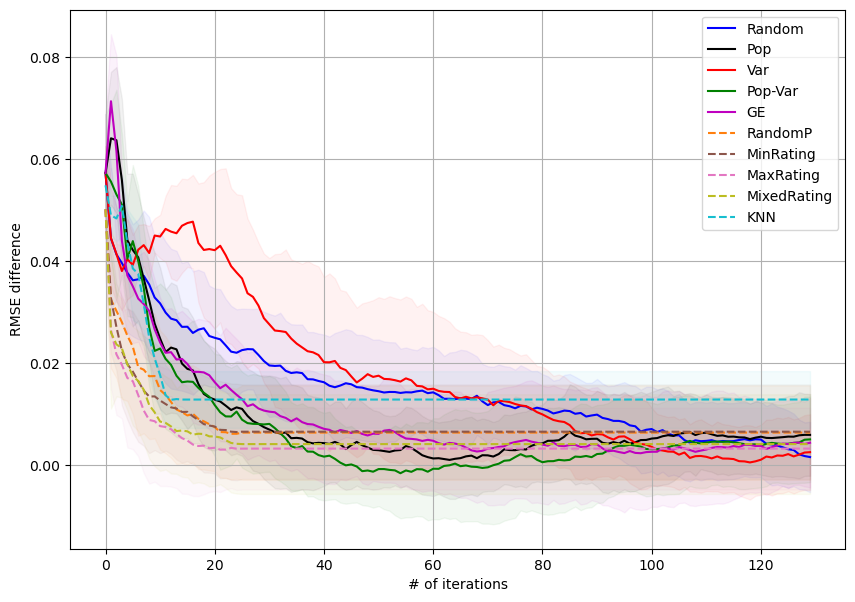

In [26]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '-', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], '--', color=color, label=label_d[strtg_name])
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE difference')

plt.savefig('./plots/cl_rmse_diff_ml100k_exp2_080924.png', dpi=300)

### 2.3. The RMSE of each group separately

In [27]:
pro_df = exp2_df[['index', 'rmse_pro', 'strtg']]
unpro_df = exp2_df[['index', 'rmse_unpro', 'strtg']]

In [28]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']

In [29]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']

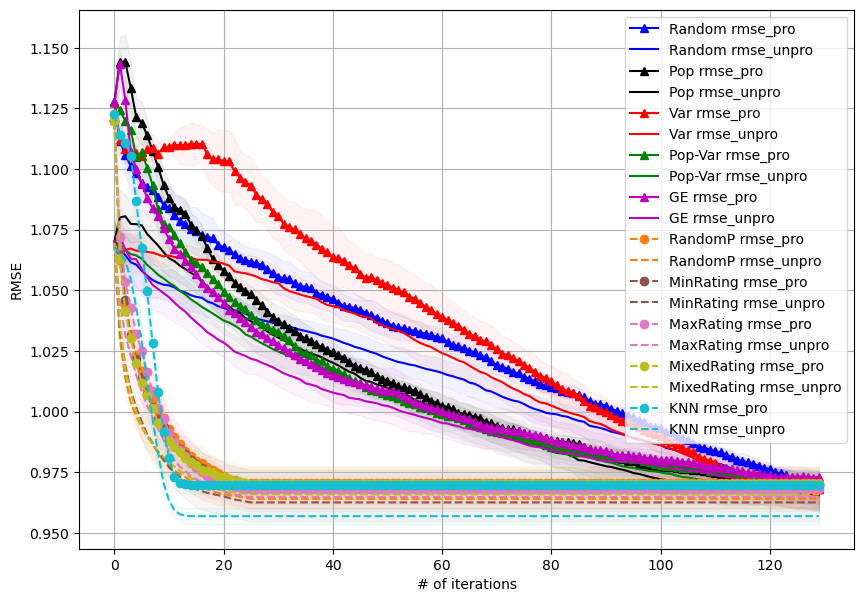

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '-^', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '-', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '--o', color=color, label=label_d[strtg_name]+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '--', color=color, label=label_d[strtg_name]+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_proUnpro_rmse_diff_ml100k_exp2_080924.png', dpi=300)

#### 2.3.1 Make Table 

In [43]:
exp2_table1_pro_df = pro_df_grouped[['index','strtg', 'mean']]
exp2_table1_unpro_df = unpro_df_grouped[['index','strtg', 'mean']]

In [44]:
print('Experiment 2, RMSE of unpersonalized algorithms for female users')
exp2_table1_pro_df[(exp2_table1_pro_df['strtg'].isin(strtg_l))&(exp2_table1_pro_df['index'].isin([0,50,100,150,200,250,300]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 2, RMSE of unpersonalized algorithms for female users


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,1.046,0.997,0.978,0.959,0.942,0.925,0.908
pop,1.046,0.976,0.945,0.926,0.910,0.902,0.898
var,1.046,1.024,1.001,0.970,0.944,0.920,0.903
popvar,1.046,0.970,0.940,0.923,0.909,0.903,0.898
ge,1.046,0.968,0.941,0.923,0.908,0.901,0.898


In [45]:
print('Experiment 2, RMSE of unpersonalized algorithms for male users')
exp2_table1_unpro_df[(exp2_table1_unpro_df['strtg'].isin(strtg_l))&(exp2_table1_unpro_df['index'].isin([0,50,100,150,200,250,300]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 2, RMSE of unpersonalized algorithms for male users


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,1.034,1.004,0.990,0.978,0.966,0.953,0.939
pop,1.034,1.008,0.983,0.965,0.946,0.937,0.933
var,1.034,1.008,0.991,0.974,0.960,0.947,0.936
popvar,1.034,1.000,0.978,0.960,0.944,0.936,0.931
ge,1.034,0.989,0.967,0.953,0.943,0.935,0.931


In [46]:
print('Experiment 2, RMSE of personalized algorithms for female users')
exp2_table1_pro_df[(exp2_table1_pro_df['strtg'].isin(pers_strtg_l))&(exp2_table1_pro_df['index'].isin([0,5,10,20,30,40,50]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 2, RMSE of personalized algorithms for female users


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,1.046,0.948,0.923,0.904,0.899,0.896,0.895
MinRating,1.046,0.951,0.925,0.906,0.900,0.897,0.896
MaxRating,1.046,0.952,0.925,0.906,0.899,0.896,0.895
MixedRating,1.046,0.950,0.924,0.905,0.899,0.896,0.895
KNN,1.049,0.978,0.903,0.895,0.895,0.895,0.895


In [47]:
print('Experiment 2, RMSE of personalized algorithms for male users')
exp2_table1_unpro_df[(exp2_table1_unpro_df['strtg'].isin(pers_strtg_l))&(exp2_table1_unpro_df['index'].isin([0,5,10,20,30,40,50]))].pivot(index='strtg', columns='index', values='mean').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 1, RMSE of personalized algorithms for male users


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,1.031,0.961,0.947,0.936,0.933,0.931,0.931
MinRating,1.031,0.966,0.949,0.938,0.934,0.932,0.931
MaxRating,1.031,0.971,0.952,0.938,0.934,0.932,0.931
MixedRating,1.031,0.966,0.949,0.938,0.934,0.932,0.931
KNN,1.029,0.990,0.940,0.934,0.934,0.934,0.934


### 2.3.2 t-test

In [48]:
star_df = []
for strtg in strtg_l:
    for ind in [0,50,100,150,200,250,300]:
        rmse_pro = pro_df[(pro_df['strtg']==strtg)&(pro_df['index']==ind)]['rmse_pro']
        rmse_unpro = unpro_df[(unpro_df['strtg']==strtg)&(unpro_df['index']==ind)]['rmse_unpro']
        t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)
        if p<alpha:
            star_df.append([ind, strtg, True])
        else:
            star_df.append([ind, strtg, False])
star_df = pd.DataFrame(star_df, columns=['index', 'strtg', 'star'])

/var/folders/v3/2p6t1d2n5271pw5ytpwwh_9w0000gn/T/ipykernel_20313/3368273689.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)


In [49]:
print('Experiment 2, nonpersonalized')
star_df.pivot(index='strtg', columns='index', values='star').reindex(index=['ran', 'pop','var','popvar','ge'])

Experiment 1, nonpersonalized


index,0,50,100,150,200,250,300
strtg,,,,,,,
ran,True,True,True,True,True,True,True
pop,True,True,True,True,True,True,True
var,True,True,True,True,True,True,True
popvar,True,True,True,True,True,True,True
ge,True,True,True,True,True,True,True


In [50]:
pers_star_df = []
for strtg in pers_strtg_l:
    for ind in [0,5,10,20,30,40,50]:
        rmse_pro = pro_df[(pro_df['strtg']==strtg)&(pro_df['index']==ind)]['rmse_pro']
        rmse_unpro = unpro_df[(unpro_df['strtg']==strtg)&(unpro_df['index']==ind)]['rmse_unpro']
        t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)
        if p<alpha:
            pers_star_df.append([ind, strtg, True])
        else:
            pers_star_df.append([ind, strtg, False])
pers_star_df = pd.DataFrame(pers_star_df, columns=['index', 'strtg', 'star'])

/var/folders/v3/2p6t1d2n5271pw5ytpwwh_9w0000gn/T/ipykernel_20313/2408511836.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t, p = scipy.stats.ttest_ind(rmse_pro, rmse_unpro)
/Users/sipei/micromamba/envs/fairness_env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/sipei/micromamba/envs/fairness_env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [51]:
print('Experiment 2, personalized')
pers_star_df.pivot(index='strtg', columns='index', values='star').reindex(index=['Random', 'MinRating','MaxRating','MixedRating','KNN'])

Experiment 1, personalized


index,0,5,10,20,30,40,50
strtg,,,,,,,
Random,True,True,True,True,True,True,True
MinRating,True,True,True,True,True,True,True
MaxRating,True,True,True,True,True,True,True
MixedRating,True,True,True,True,True,True,True
KNN,False,False,False,False,False,False,False


### 2.4. The count of men and women that their info was added at each iteration

In [31]:
pro_df = exp2_df[['index', 'c_pro', 'strtg']]
unpro_df = exp2_df[['index', 'c_unpro', 'strtg']]

In [32]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']

In [33]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']

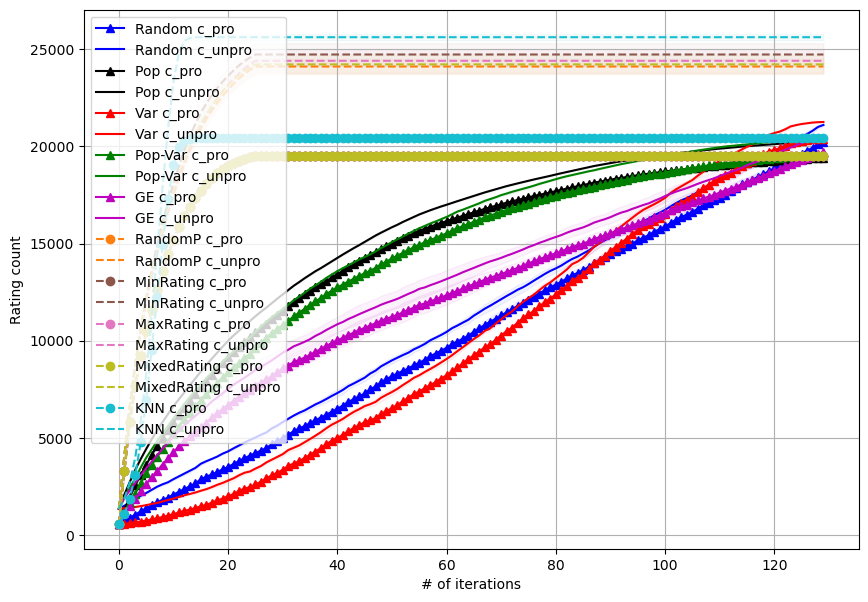

In [34]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '-^', color=color, label=label_d[strtg_name]+' c_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '-', color=color, label=label_d[strtg_name]+' c_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)

for color, strtg_name in list(zip(pers_color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], '--o', color=color, label=label_d[strtg_name]+' c_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.05)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], '--', color=color, label=label_d[strtg_name]+' c_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.05)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('Rating count')

plt.savefig('./plots/cl_proUnpro_rate_c_ml100k_exp2_080924.png', dpi=300)

## 3. Plots together

Don't run the cells!

### 3.1 RMSE plots

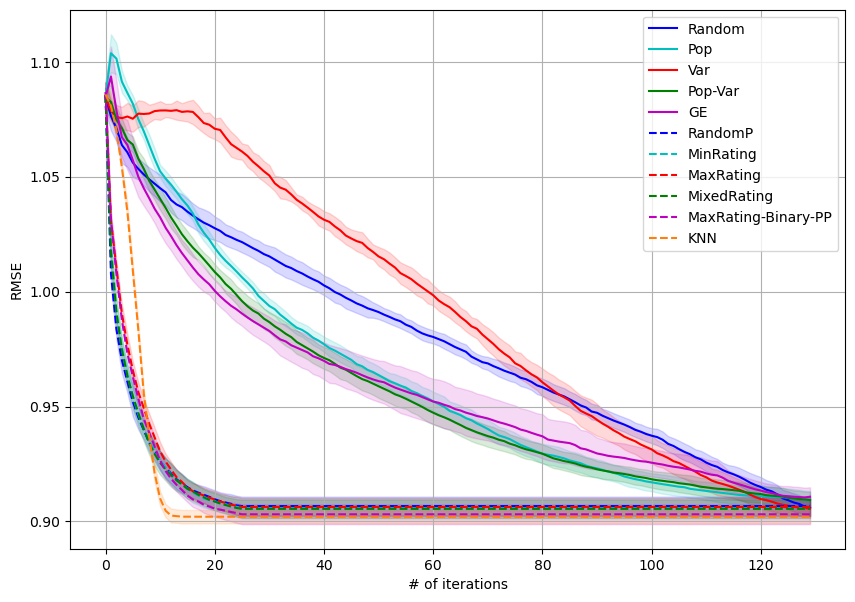

In [6]:
# exp 1

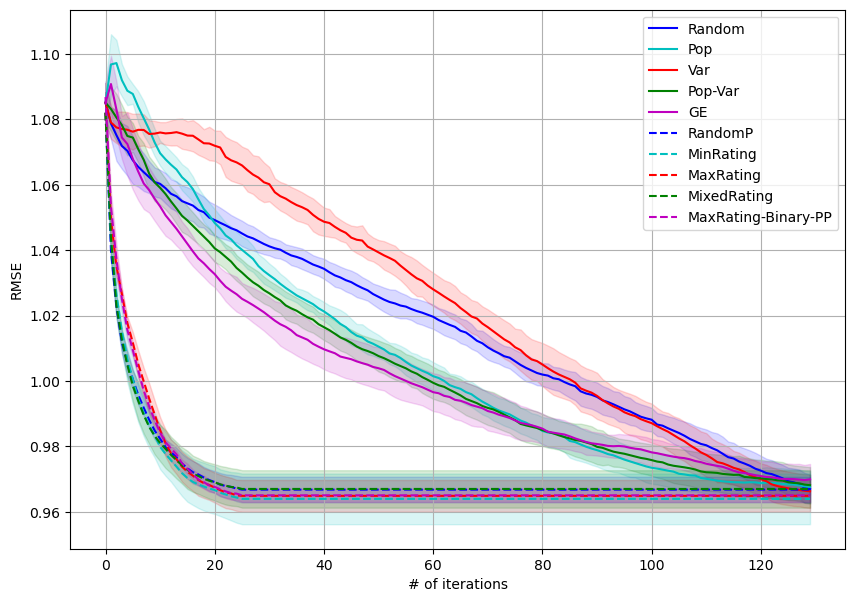

In [31]:
# exp 2

### 3.2 Rating count plots

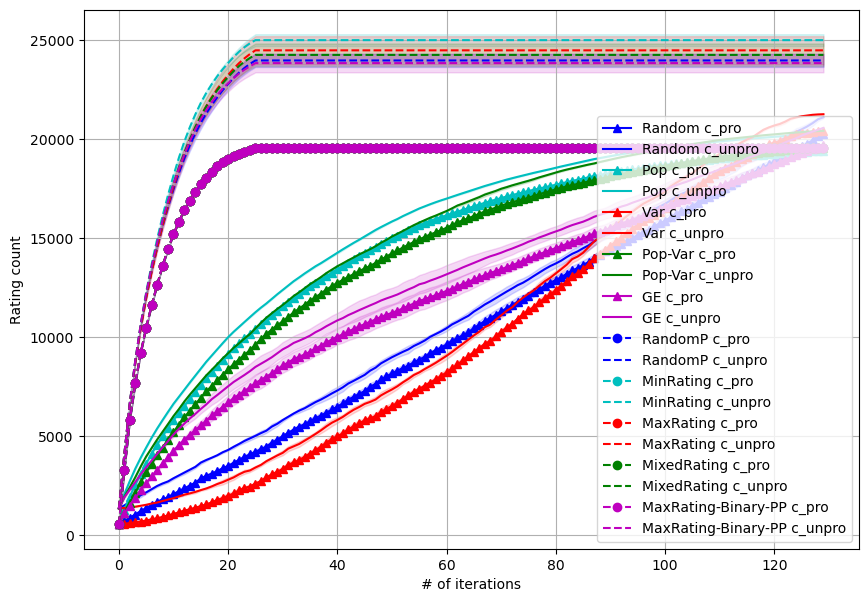

In [48]:
# exp 1

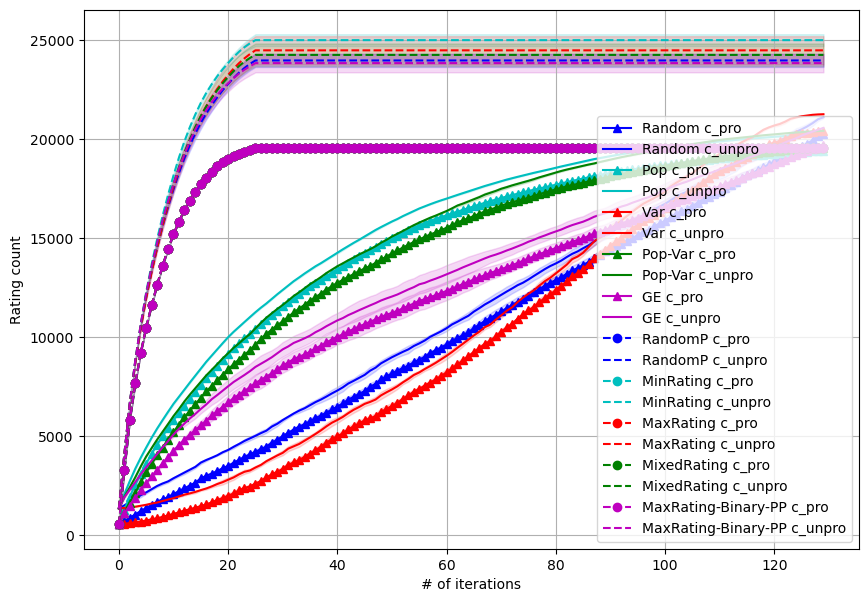

In [48]:
# exp 2

### 1.1. RMSE Comparison

In [47]:
df = exp1_df[['index', 'rmse', 'strtg']]

In [48]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']
df_grouped.head()

,index,strtg,mean,std,count,ci,ci_lower,ci_upper
0,0,MaxRating,1.085,0.004,5,0.003,1.082,1.089
1,0,MaxRating-Binary-PP,1.088,0.005,5,0.004,1.084,1.093
2,0,MinRating,1.085,0.004,5,0.003,1.082,1.089
3,0,MixedRating,1.085,0.004,5,0.003,1.082,1.089
4,0,Random,1.085,0.004,5,0.003,1.082,1.089


ValueError: 'tab:orange--' is not a valid format string (unrecognized character 't')

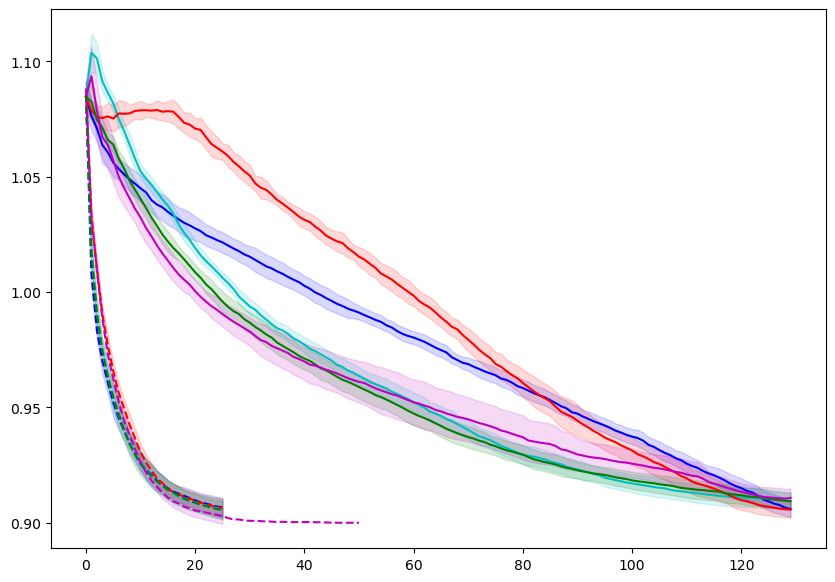

In [49]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], color+'-', label=strtg_name)
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)

for color, strtg_name in list(zip(color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], color+'--', label=strtg_name)
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)
# ax.plot(list(range(0, len(results[0][1]['rmse']))), [fin_acc]*len(list(range(0, len(results[0][1]['rmse'])))),'-', label='all-tr')
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_rmse_ml_exp1_020724.png', dpi=300)

### 1.2. RMSE Difference

In [ ]:
df = exp1_df[['index', 'rmse_pro','rmse_unpro', 'strtg']]

In [ ]:
df['rmse_diff'] = df['rmse_pro'] - df['rmse_unpro']
df = df[['index', 'rmse_diff', 'strtg']]

In [ ]:
df_grouped = df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
df_grouped = df_grouped.droplevel(axis=1, level=0).reset_index()

df_grouped['ci'] = 1.95 * df_grouped['std'] / np.sqrt(df_grouped['count'])
df_grouped['ci_lower'] = df_grouped['mean'] - df_grouped['ci']
df_grouped['ci_upper'] = df_grouped['mean'] + df_grouped['ci']
df_grouped.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], color+'-', label=strtg_name)
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)

for color, strtg_name in list(zip(color_l, pers_strtg_l)):
    strtg_df_grouped = df_grouped[df_grouped.strtg == strtg_name]
    x = strtg_df_grouped['index']
    ax.plot(x, strtg_df_grouped['mean'], color+'--', label=strtg_name)
    ax.fill_between(
        x, strtg_df_grouped['ci_lower'], strtg_df_grouped['ci_upper'], color=color, alpha=.15)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE difference')

plt.savefig('./plots/cl_rmse_diff_ml_exp1_020724.png', dpi=300)

### 1.3. The RMSE of each group separately

In [ ]:
pro_df = exp1_df[['index', 'rmse_pro', 'strtg']]
unpro_df = exp1_df[['index', 'rmse_unpro', 'strtg']]

In [ ]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']
pro_df_grouped.head()

In [ ]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']
unpro_df_grouped.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], color+'-^', label=strtg_name+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.15)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], color+'-', label=strtg_name+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.15)

for color, strtg_name in list(zip(color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], color+'--o', label=strtg_name+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.15)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], color+'--', label=strtg_name+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.15)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('RMSE')

plt.savefig('./plots/cl_proUnpro_rmse_diff_ml_exp1_020724.png', dpi=300)

### 1.4. The count of men and women that their info was added at each iteration

In [ ]:
pro_df = exp1_df[['index', 'c_pro', 'strtg']]
unpro_df = exp1_df[['index', 'c_unpro', 'strtg']]

In [ ]:
pro_df_grouped = pro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
pro_df_grouped = pro_df_grouped.droplevel(axis=1, level=0).reset_index()

pro_df_grouped['ci'] = 1.95 * pro_df_grouped['std'] / np.sqrt(pro_df_grouped['count'])
pro_df_grouped['ci_lower'] = pro_df_grouped['mean'] - pro_df_grouped['ci']
pro_df_grouped['ci_upper'] = pro_df_grouped['mean'] + pro_df_grouped['ci']
pro_df_grouped.head()

In [ ]:
unpro_df_grouped = unpro_df.groupby(['index', 'strtg']).agg(['mean', 'std', 'count'])
unpro_df_grouped = unpro_df_grouped.droplevel(axis=1, level=0).reset_index()

unpro_df_grouped['ci'] = 1.95 * unpro_df_grouped['std'] / np.sqrt(unpro_df_grouped['count'])
unpro_df_grouped['ci_lower'] = unpro_df_grouped['mean'] - unpro_df_grouped['ci']
unpro_df_grouped['ci_upper'] = unpro_df_grouped['mean'] + unpro_df_grouped['ci']
unpro_df_grouped.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

for color, strtg_name in list(zip(color_l, strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], color+'-^', label=strtg_name+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.15)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], color+'-', label=strtg_name+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.15)

for color, strtg_name in list(zip(color_l, pers_strtg_l)):
    strtg_pro_df_grouped = pro_df_grouped[pro_df_grouped.strtg == strtg_name]
    x = strtg_pro_df_grouped['index']
    ax.plot(x, strtg_pro_df_grouped['mean'], color+'--o', label=strtg_name+' rmse_pro')
    ax.fill_between(
        x, strtg_pro_df_grouped['ci_lower'], strtg_pro_df_grouped['ci_upper'], color=color, alpha=.15)

    strtg_unpro_df_grouped = unpro_df_grouped[unpro_df_grouped.strtg == strtg_name]
    x = strtg_unpro_df_grouped['index']
    ax.plot(x, strtg_unpro_df_grouped['mean'], color+'--', label=strtg_name+' rmse_unpro')
    ax.fill_between(
        x, strtg_unpro_df_grouped['ci_lower'], strtg_unpro_df_grouped['ci_upper'], color=color, alpha=.15)
# ax.set_ylim(ymin=0)

ax.grid(True)
legend = ax.legend(loc='best')
plt.xlabel('# of iterations')
plt.ylabel('Rating count')

plt.savefig('./plots/cl_proUnpro_rate_c_ml_exp1_020724.png', dpi=300)